# Prerequisite<br>
<li> <a href="https://www.youtube.com/watch?v=8p3S9aR3n4o"> How polynomial regression is applied in real life? </a></li>
<li> <a href="https://www.youtube.com/watch?v=qsIrQi0fzbY"> Vectorization / Numpy </a></li>
<li> <a href="https://www.youtube.com/watch?v=mmclAQ-UlbE"> Gradient Descent for Multiple Variable</a></li>
<li> <a href="https://www.youtube.com/watch?v=FDCfw-YqWTE"> Normalization </a></li>

# Question
I threw a baseball on the 100 meter building. <br>
I measured the height of the baseball for 10 seconds. <br>
Assume no air resistance. Find the velocity. <br>

# Variable <br>
<li>m = number of points
<li>W = weight vectors
<li>d_W = partial derivative of W

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

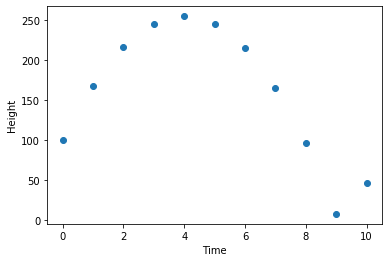

In [3]:
'''
Suppose data can be represented as following model
y = W[0] + W[1] * x + W[2] * x^2
'''
m = 11
degree = 3
data = np.array(pd.read_csv("data/2.csv", header=None))

X = np.array(data[:, 0])
Y = np.array(data[:, 1])
m = len(X)

plt.scatter(X, Y)
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()

X = X[:-1]
Y = Y[:-1]
m -= 1

In [1]:
def y_hat(x, W):
    return np.sum([W[i] * pow(x, i) for i in range(degree)])

def compute_cost(W):
    return np.mean([(y_hat(X[i], W) - Y[i]) ** 2 for i in range(m)]) / 2

def partial_deriv(W):
    d_W = np.zeros(degree)
    
    for i in range(m):
        d_W += np.array([(y_hat(X[i], W) - Y[i]) * np.power(X[i], j) for j in range(degree)])
    
    return d_W

def model(learn_rate, n_iters, W):
    Cost = []
    
    for i in range(n_iters):
        W -= learn_rate * partial_deriv(W)
        if i % 100 == 0:
            Cost.append(compute_cost(W))
    
    return W, Cost

def graph(W):
    plt.title('Polynomial Regression')
    plt.scatter(X, Y)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]
    
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

    X_temp = np.linspace(0, 10, 1000)
    plt.scatter(X_temp, [y_hat(x_temp, W) for x_temp in X_temp], s=1)
    plt.show()

W, Cost = model(0.0001, 50000, np.zeros(degree))
graph(W)
print(W)
plt.xlabel("iteration (hundreds)")
plt.ylabel("cost")
plt.plot(Cost)

IndentationError: unexpected indent (<ipython-input-1-c9f4dcea2407>, line 34)

# Discuss<br>
<li> <a href="https://www.youtube.com/watch?v=AXDByU3D1hA"> How to find appropriate alpha, and n_iters </a></li>